# Regression and Classification
- Linear regression, Ridge, Lasso, Elastic net, Logistic regression, Naive Nayes Classifier

## 1. Import Packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## 2. Load dataset

In [65]:
dataset1 = pd.read_csv('wave.csv')
dataset2 = pd.read_csv('cancer.csv')

In [66]:
# Explore dataset
dataset1.head()

,x,y
0,-0.753,-0.448
1,2.700,0.331
2,1.390,0.779
3,0.592,0.035
4,-2.060,-1.390


In [67]:
dataset2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,18.0,10.4,123.0,1000.0,0.1180,0.2780,0.3000,0.1470,0.242,0.0787,...,17.3,185.0,2020.0,0.162,0.666,0.712,0.265,0.460,0.1190,0.0
1,20.6,17.8,133.0,1330.0,0.0847,0.0786,0.0869,0.0702,0.181,0.0567,...,23.4,159.0,1960.0,0.124,0.187,0.242,0.186,0.275,0.0890,0.0
2,19.7,21.3,130.0,1200.0,0.1100,0.1600,0.1970,0.1280,0.207,0.0600,...,25.5,153.0,1710.0,0.144,0.424,0.450,0.243,0.361,0.0876,0.0
3,11.4,20.4,77.6,386.0,0.1420,0.2840,0.2410,0.1050,0.260,0.0974,...,26.5,98.9,568.0,0.210,0.866,0.687,0.258,0.664,0.1730,0.0
4,20.3,14.3,135.0,1300.0,0.1000,0.1330,0.1980,0.1040,0.181,0.0588,...,16.7,152.0,1580.0,0.137,0.205,0.400,0.163,0.236,0.0768,0.0


In [68]:
print("The shape of data1 :", dataset1.shape)
print("The shape of data2 :", dataset2.shape)

The shape of data1 : (40, 2)
The shape of data2 : (569, 31)


## 3. Make Dataset

In [69]:
X1 = dataset1.iloc[:,0]
Y1 = dataset1.iloc[:,1]

X2 = dataset2.iloc[:,0:30]
Y2 = dataset2.iloc[:,30]

In [70]:
print("The shape of X1 :", X1.shape)
print("The shape of Y1 :", Y1.shape)
print("The shape of X2 :", X2.shape)
print("The shape of Y2 :", Y2.shape)

The shape of X1 : (40,)
The shape of Y1 : (40,)
The shape of X2 : (569, 30)
The shape of Y2 : (569,)


In [71]:
X1 = X1.values.reshape(-1,1)

In [77]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2, Y2, stratify=Y2, random_state=42)

## 4-1. Linear Regression

In [53]:
lr = LinearRegression().fit(x1_train,y1_train)

In [54]:
print("Weight :", lr.coef_)
print("Bias :", lr.intercept_)

Weight : [0.52468771]
Bias : -0.09370435583146063


## 4-2. Accuracy Analysis

In [55]:
print("prediction :", lr.predict(x1_test))
print("train accuracy :", lr.score(x1_train, y1_train))
print("test accuracy :", lr.score(x1_test, y1_test))

prediction : [-0.749564    0.2583611   0.80351163 -1.17456105 -1.60480497 -1.09061101
  0.19697264  1.385915   -0.30777694 -1.52085494]
train accuracy : 0.688664719797307
test accuracy : 0.6249237531352055


## 5-1. Ridge Regression

In [56]:
rg = Ridge().fit(x1_train,y1_train)

## 5-2. Accuracy Analysis

In [57]:
print("prediction :", rg.predict(x1_test))
print("train accuracy :", rg.score(x1_train, y1_train))
print("test accuracy :", rg.score(x1_test, y1_test))

prediction : [-0.74315748  0.25339702  0.79239761 -1.16336005 -1.58875031 -1.08035707
  0.1927011   1.36823077 -0.30635431 -1.50574733]
train accuracy : 0.6885770766363744
test accuracy : 0.6343861369498739


## 5-3. Find optimum value (alpha)

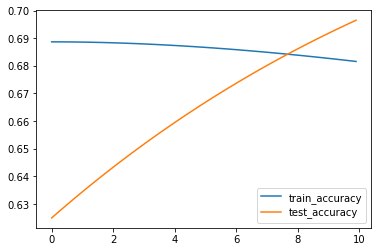

In [59]:
train_accuracy = []
test_accuracy = []
alphas = np.arange(start=0, stop=10, step=0.1) 
for alpha in alphas:
    rg1 = Ridge(alpha=alpha).fit(x1_train,y1_train) 
    train_accuracy.append(rg1.score(x1_train,y1_train))
    test_accuracy.append(rg1.score(x1_test,y1_test))
plt.plot(alphas,train_accuracy, label = "train_accuracy")
plt.plot(alphas,test_accuracy, label = "test_accuracy")
plt.legend()
plt.show()

## 6-1. Lasso Regression

In [60]:
lasso = Lasso().fit(x1_train, y1_train)

## 6-2. Accuracy Analysis

In [61]:
print("prediction :", lasso.predict(x1_test))
print("train accuracy :", lasso.score(x1_train, y1_train))
print("test accuracy :", lasso.score(x1_test, y1_test))

prediction : [-0.37907958 -0.02870773  0.16079584 -0.52681576 -0.67637585 -0.49763331
 -0.0500474   0.36324913 -0.22550691 -0.64719339]
train accuracy : 0.3955665115456999
test accuracy : 0.5525152469712177


In [62]:
# reduce alpha
lasso1 = Lasso(alpha=0.1).fit(x1_train,y1_train)
print("train accuracy :", lasso1.score(x1_train, y1_train))
print("test accuracy :", lasso1.score(x1_test, y1_test))

train accuracy : 0.685733737714791
test accuracy : 0.674429171821751


## 7-1. Elastic Net

In [63]:
en = ElasticNet(alpha=0.2, l1_ratio=0.2).fit(x1_train,y1_train)

## 7-2. Accuracy Analysis

In [64]:
print("prediction :", en.predict(x1_test))
print("train accuracy :", en.score(x1_train, y1_train))
print("test accuracy :", en.score(x1_test, y1_test))

prediction : [-0.70602687  0.22462647  0.72798348 -1.09844186 -1.49570148 -1.02092779
  0.16794431  1.26573737 -0.29810906 -1.41818741]
train accuracy : 0.6846171632839229
test accuracy : 0.6818018943330972


## 8-1. Logistic Regression

In [78]:
lgr = LogisticRegression(solver="liblinear")
lgr.fit(x2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 8-2. Accuracy Analysis

In [79]:
print("prediction :", lgr.predict(x2_test))
print("train accuracy :", lgr.score(x2_train, y2_train))
print("test accuracy :", lgr.score(x2_test, y2_test))

prediction : [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
train accuracy : 0.9553990610328639
test accuracy : 0.958041958041958


## 8-3. Regularization

In [80]:
lgr1 = LogisticRegression(solver="liblinear",C=1000)  # default of C = 0.1
lgr1.fit(x2_train,y2_train)
print("prediction :", lgr1.predict(x2_test))
print("train accuracy :", lgr1.score(x2_train, y2_train))
print("test accuracy :", lgr1.score(x2_test, y2_test))

prediction : [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
train accuracy : 0.9741784037558685
test accuracy : 0.965034965034965


In [81]:
#규제바꾸기
lgr2 = LogisticRegression(solver="liblinear",penalty="l1")  # L1
lgr2.fit(x2_train,y2_train)
print("prediction :", lgr2.predict(x2_test))
print("train accuracy :", lgr2.score(x2_train, y2_train))
print("test accuracy :", lgr2.score(x2_test, y2_test))

prediction : [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
train accuracy : 0.9577464788732394
test accuracy : 0.958041958041958


In [82]:
#규제바꾸기
lgr3 = LogisticRegression(solver="liblinear",penalty="l2")  # L2
lgr3.fit(x2_train,y2_train)
print("prediction :", lgr3.predict(x2_test))
print("train accuracy :", lgr3.score(x2_train, y2_train))
print("test accuracy :", lgr3.score(x2_test, y2_test))

prediction : [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
train accuracy : 0.9553990610328639
test accuracy : 0.958041958041958


## 9-1. Naive Nayes Classifier

In [83]:
nb = GaussianNB().fit(x2_train,y2_train)

## 9-2. Accuracy Analysis

In [84]:
print("prediction :", nb.predict(x2_test))
print("train accuracy :", nb.score(x2_train, y2_train))
print("test accuracy :", nb.score(x2_test, y2_test))

prediction : [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
train accuracy : 0.9460093896713615
test accuracy : 0.9370629370629371
